# Diamond price prediction modeling - EDA

## Objective: Generate a statistical and descriptive analysis of the data of characteristics and prices of diamonds

### Content:

#### 1. Data exploration
#### 2. Data Cleansing
#### 3. Data Analysis
#### 4. Data Balanced
#### 5. Dimensionallity Increment

## Libraries

In [8]:
#data manipulation librarys
import pandas as pd

#visualization librarys
import matplotlib.pyplot as plt
import seaborn as sns

#math librarys
import numpy as np
import pingouin as pg
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
from scipy.stats import f_oneway

#preprocessing librarys
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# EDA

## Data exploration

Data reading. Dataset is read for all exploratory analysis

In [9]:
df = pd.read_excel("../data/diamonds.xlsx")

In [10]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Data shape

In [11]:
df.shape

(53940, 10)

#### Columns identification

In [12]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

##### Null data identification for cleanup

In [13]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are not null values ​​in any of the columns, so it is not necessary to replace by estimators unless outliers or outliers are found later on that may affect the modeling.

## Descriptive analysis of the numeric columns

In [14]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


With the descriptive table above, we can idenfity that there are values that will need to be cleaned later, such as the x, y, z dimensions, because there are cero values which should represent an error because those are dimensions of a fisic stones. 

## Data cleansing

A class called OutlierDetector is defined below. This class has several methods such as errors detection (negative or null values), outliers detection, methods to visualize those values, and methos to fix those values

In [15]:
class OutlierDetector:
    def __init__(self, df, column):
        self.df = df
        self.column = column

    def detect_errors(self):
        #errors are negative values and zeros
        errors = self.df[(self.df[self.column].isnull()) | (self.df[self.column] <= 0)]
        return errors

    def replace_errors(self):
        #negative values are replaced with nan
        self.df[self.column] = np.where(self.df[self.column] < 0, np.nan, self.df[self.column])
        #replace negative values and zeros with the mean
        self.df[self.column] = self.df[self.column].fillna(self.df[self.column].mean())
        return self.df

    def detect_outliers(self):
        #outliers are values outside the 0.2 and 0.98 percentile
        q1 = self.df[self.column].quantile(0.02)
        q2 = self.df[self.column].quantile(0.98)
        outliers = self.df[(self.df[self.column] < q1) | (self.df[self.column] > q2)]
        return outliers

    def visualize_outliers(self):
        #graphical representation of outliers using boxplot
        outliers = self.detect_outliers()
        plt.figure(figsize=(8, 6))
        sns.set(style="whitegrid")
        sns.boxplot(x=self.df[self.column])
        plt.title(f"Boxplot of {self.column}")
        plt.show()

    def replace_outliers(self):
        #the values to replace the outliers are the 0.2 and 0.98 percentile as a limit
        q1 = self.df[self.column].quantile(0.02)
        q2 = self.df[self.column].quantile(0.98)
        #replace outliers with the limit values if they are outside the limit
        self.df[self.column] = np.where(self.df[self.column] < q1, q1, self.df[self.column])
        self.df[self.column] = np.where(self.df[self.column] > q2, q2, self.df[self.column])
        return self.df

Next I will create an instance of the class for each numerical variables, applying all the methods from the class

#### Depth:  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

In [16]:
outlier_detector_depth = OutlierDetector(df, 'depth')

In [17]:
outlier_detector_depth.detect_errors()

,carat,cut,color,clarity,depth,table,price,x,y,z


There are not errors detected

The values box graph show the outliers detected by the method for the column Depth. Values of Depth that are above of the 0.98 percentile and below of the 0.02 percentile

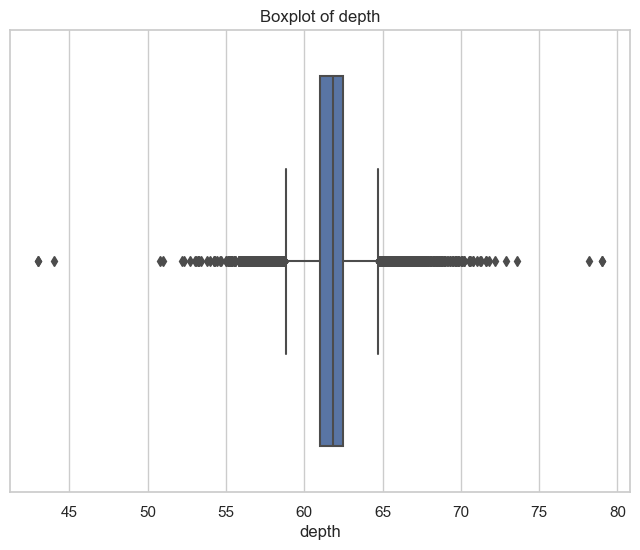

In [18]:
outlier_detector_depth.visualize_outliers()

The outliers detected in the Depth variable are replaced for the 0.02 perc and 0.98 perc using the method replace_outliers

In [19]:
outlier_detector_depth.replace_outliers()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.4,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### Table:  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

In [20]:
outlier_detector_table = OutlierDetector(df, 'table')

In [21]:
outlier_detector_table.detect_errors()

,carat,cut,color,clarity,depth,table,price,x,y,z


There are not errors detected

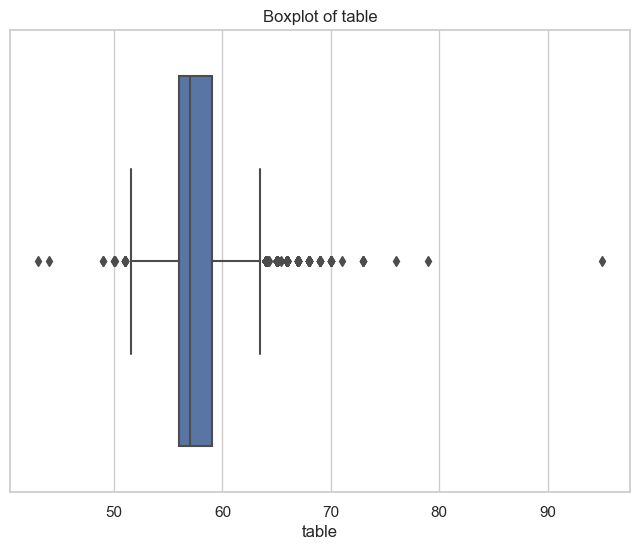

In [22]:
outlier_detector_table.visualize_outliers()

The boxplot shows the outliers detected, in particular it shows a very high value that can bias the sample

In [23]:
outlier_detector_table.replace_outliers()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.4,63.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### X: Length of the cubic zirconia in mm.

In [24]:
outlier_detector_x = OutlierDetector(df, 'x')

In [25]:
outlier_detector_x.detect_errors()

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,54.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,58.4,63.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


There are 8 errors detected by the method detect_errors, these mean values of length null or negative that is an error

In [26]:
outlier_detector_x.replace_errors()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.4,63.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


The errors are replaced by the mean of the values. The mean is used as a unbiased estimator acording with dispersion of the data

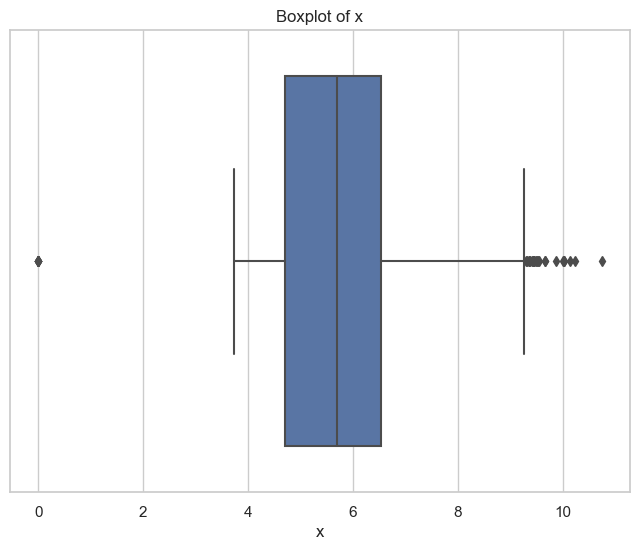

In [27]:
outlier_detector_x.visualize_outliers()

The boxplot shows the outliers detected, in particular it shows a very low value that can bias the sample

In [28]:
outlier_detector_x.replace_outliers()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,4.14,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,4.14,3.84,2.31
2,0.23,Good,E,VS1,58.4,63.0,327,4.14,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


####  Y: Width of the cubic zirconia in mm.

In [29]:
outlier_detector_y = OutlierDetector(df, 'y')

In [30]:
outlier_detector_y.detect_errors()

,carat,cut,color,clarity,depth,table,price,x,y,z
11963,1.00,Very Good,H,VS2,63.3,54.0,5139,4.14,0.0,0.0
15951,1.14,Fair,G,VS1,58.4,63.0,6381,4.14,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,4.14,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,4.14,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,4.14,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,4.14,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,4.14,0.0,0.0


There are 7 errors detected in the variable Y

In [31]:
outlier_detector_y.replace_errors()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,4.14,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,4.14,3.84,2.31
2,0.23,Good,E,VS1,58.4,63.0,327,4.14,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


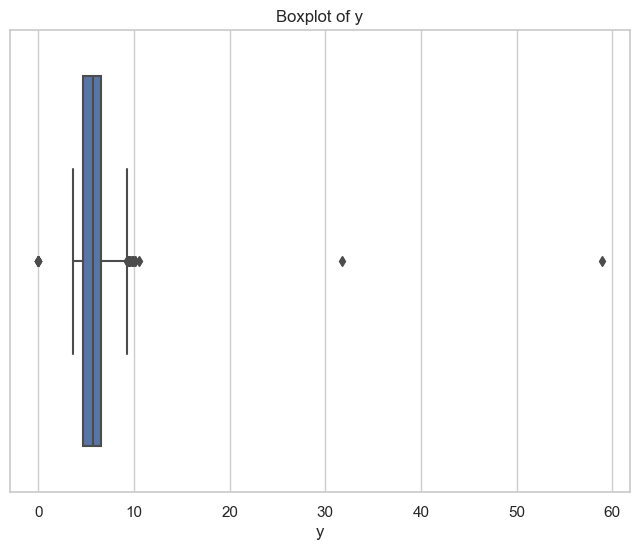

In [32]:
outlier_detector_y.visualize_outliers()

There are two values ​​well above the others, these values ​​could be errors but the process is unknown, they will be taken as outliers and replaced by the 0.98 percentile

In [33]:
outlier_detector_y.replace_outliers()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,4.14,4.16,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,4.14,4.16,2.31
2,0.23,Good,E,VS1,58.4,63.0,327,4.14,4.16,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


#### Z: Height of the cubic zirconia in mm.

In [34]:
outlier_detector_z = OutlierDetector(df, 'z')

In [35]:
outlier_detector_z.detect_errors()

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.4,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,4.14,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,54.0,5139,4.14,4.16,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,58.4,63.0,6381,4.14,4.16,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.18,8.17,0.0


This variable has a lot of error values detected, This may be due to an error in data collection or loss of information

In [36]:
outlier_detector_z.replace_errors()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,4.14,4.16,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,4.14,4.16,2.31
2,0.23,Good,E,VS1,58.4,63.0,327,4.14,4.16,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


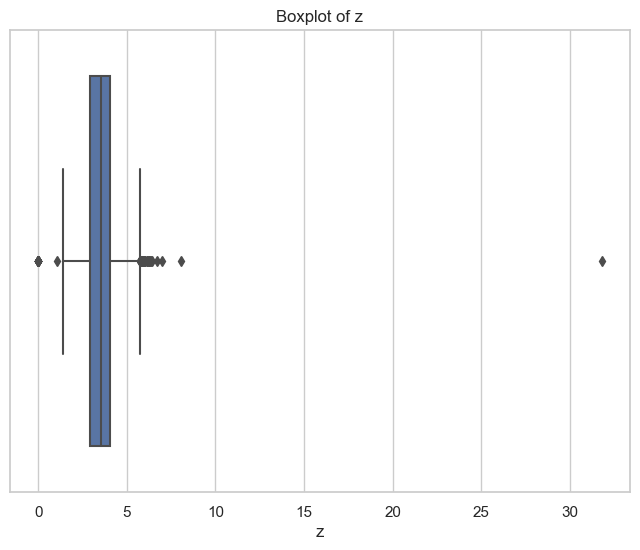

In [37]:
outlier_detector_z.visualize_outliers()

The boxplot shows the outliers detected, in particular it shows a very high value that can bias the sample

In [38]:
outlier_detector_z.replace_outliers()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,4.14,4.16,2.55
1,0.21,Premium,E,SI1,59.8,61.0,326,4.14,4.16,2.55
2,0.23,Good,E,VS1,58.4,63.0,327,4.14,4.16,2.55
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Data Analysis

A class called DataAnalyzer is defined below. This class has some methods to visualize the data in tables and graphs

In [39]:
class DataAnalyzer:
    #the column is the column that we want to analyze vs the price
    def __init__(self, df, column):
        self.df = df
        self.column = column

    def generate_table_stats(self):
        # Generate table stats with the number of registers and percentage
        print("Column:", self.column)
        print("Number of registers:", self.df[self.column].value_counts())
        print("Percentage of registers:")
        # percentage is the number of registers divided by the total number of registers
        percentage = self.df[self.column].value_counts() / self.df.shape[0]
        print(percentage)

    def visualize_boxplot(self):
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=self.column, y='price', data=self.df)
        plt.title("Boxplot of " + self.column + " vs price")
        plt.show()

    def visualize_frequency(self):
        plt.figure(figsize=(10, 5))
        sns.countplot(x=self.column, data=self.df)
        plt.title("Frequency of " + self.column)
        plt.show()


A class called HypothesisTester is defined below. This class has methos that will help to statistically analyze the significance of the variables

In [40]:
class HypothesisTester:
    def __init__(self, df, column):
        self.df = df
        #alpha is the probability of rejecting the null hypothesis when it is true
        self.alpha = 0.05
        self.column = column

    #H0: The means of the groups are equal.
    #H1: The means of the groups are not equal.
    def anova_test(self):
        dimension_groups = [group[1]['price'] for group in self.df.groupby(self.column)]
        #anova test is calculated using the one-way f-test all the groups of prices generated above
        f_statistic, p_value = f_oneway(*dimension_groups)
        print("ANOVA Test for column:", self.column)
        print("Resultados de la prueba ANOVA:")
        print("Valor F:", f_statistic)
        print("Valor p:", p_value)
        #if p_value is less than alpha, we reject the null hypothesis
        if p_value < self.alpha:
            print("La diferencia entre las medias es estadísticamente significativa.")
        else:
            print("No se puede afirmar que la diferencia entre las medias sea estadísticamente significativa.")
    
    def mann_whitney_u_test(self, val1, val2):
        #we get the prices of the two groups we want to compare
        subset1 = self.df[self.df[self.column] == val1]['price']
        subset2 = self.df[self.df[self.column] == val2]['price']
        #mann-whitney u test is calculated using the two groups of prices generated above
        statistic, p_value = mannwhitneyu(subset1, subset2)
        print(f"Mann-Whitney U Test ({val1} vs {val2}):")
        print('p-value:', p_value)
    
    #method to generate the densogram of the two groups we want to compare
    def visualize_distributions(self, val1, val2):
        val1_data = self.df[self.df[self.column] == val1]['price']
        val2_data = self.df[self.df[self.column] == val2]['price']
        val1_data = val1_data.sample(n=min(len(val1_data), len(val2_data)))
        val2_data = val2_data.sample(n=min(len(val1_data), len(val2_data)))
        bins = np.linspace(min(val1_data.min(), val2_data.min()), max(val1_data.max(), val2_data.max()), num=20)
        plt.hist(val1_data, bins, alpha=0.5, label=val1)
        plt.axvline(val1_data.mean(), color='blue', linestyle='dashed', linewidth=1)
        plt.hist(val2_data, bins, alpha=0.5, label=val2)
        plt.axvline(val2_data.mean(), color='red', linestyle='dashed', linewidth=1)
        plt.legend(loc='upper right')
        plt.title(f'Distribution of {val1} vs {val2}')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        plt.show()

Next I will create an instance of the class for each categorical variables, applying all the methods from both classes to analyze descriptive and statistically the significance of each of those features

#### Cut:  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

In [41]:
analyzer_cut = DataAnalyzer(df, 'cut')

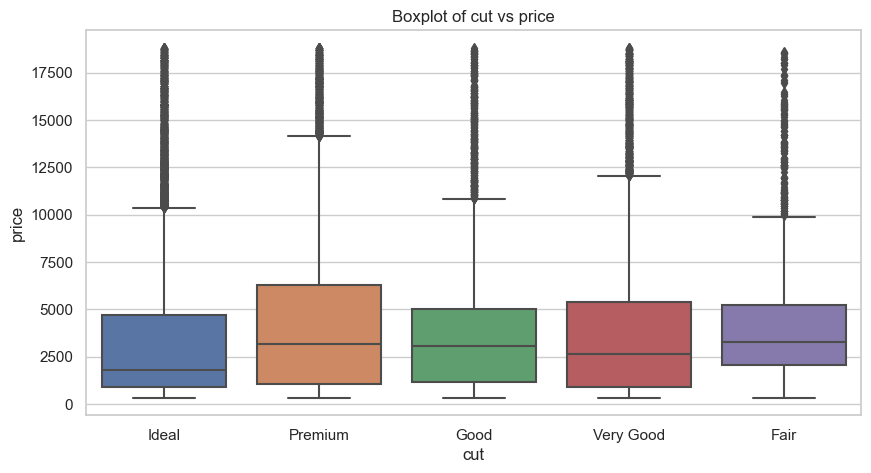

In [42]:
analyzer_cut.visualize_boxplot()

The box plot graph between the Price and the Cut values show that graphically exist a difference in the price of each kind of cut. This difference which invites us to think that the price is related to the quality of the cut, however this must be validated by a statistical test

*<center>H0: Average price of stone with X quality = Average price of stone with Y quality<center>*
*<center>H1: Average price of stone with X quality <> Average price of stone with Y quality<center>*

In [43]:
tester_cut = HypothesisTester(df, 'cut')

In [44]:
tester_cut.anova_test()

ANOVA Test for column: cut
Resultados de la prueba ANOVA:
Valor F: 175.68871735080606
Valor p: 8.42830730759452e-150
La diferencia entre las medias es estadísticamente significativa.


According to the results obtained in the ANOVA test, we can conclude that there is a statistically significant difference between the means of the prices depending on the quality of the cuts. This is because the value p-value obtained is much less than the significant value 0.05 so we could reject the null hypothesis

Next I going to generate the hypothesis statisticall test for each pair of cut values in order to identifying if there is any cut quality that does not generate a significantly higher or lower price

Mann-Whitney U Test (Ideal vs Premium):
p-value: 7.073613249513787e-166


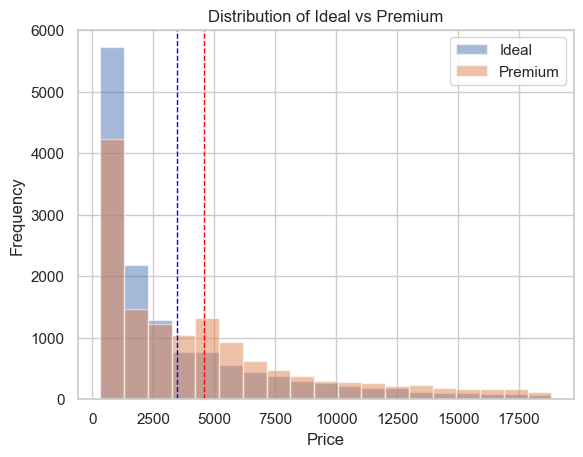

Mann-Whitney U Test (Premium vs Very Good):
p-value: 3.5036149398936224e-35


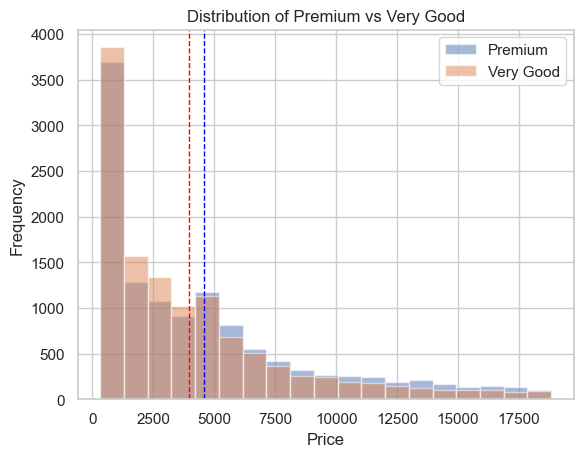

Mann-Whitney U Test (Very Good vs Good):
p-value: 0.022996560226878713


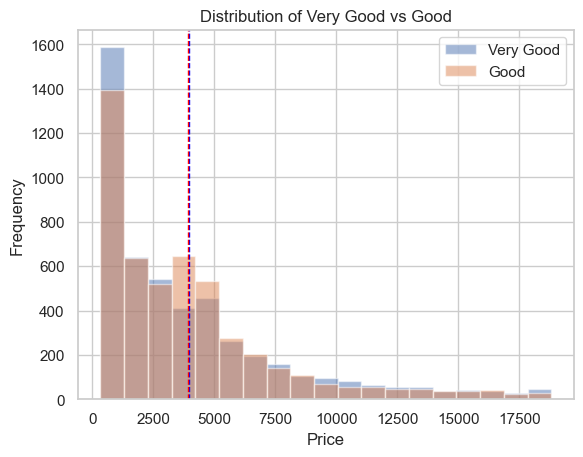

Mann-Whitney U Test (Good vs Fair):
p-value: 5.551241257153132e-14


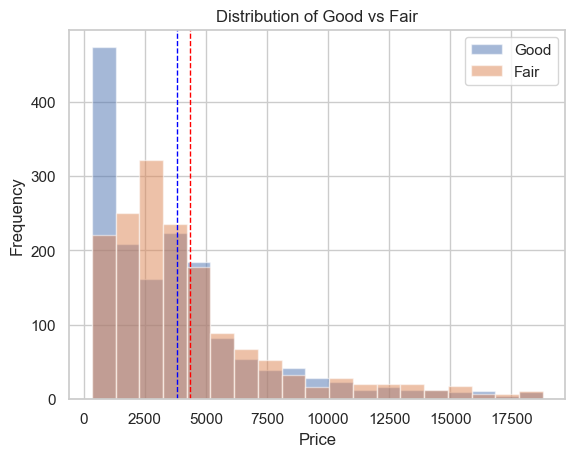

In [45]:
#the mann_whitney_u_test and visualize_distributions methods are use for each pair of cut values
tester_cut.mann_whitney_u_test(val1='Ideal', val2='Premium')
tester_cut.visualize_distributions(val1='Ideal', val2='Premium')
tester_cut.mann_whitney_u_test(val1='Premium', val2='Very Good')
tester_cut.visualize_distributions(val1='Premium', val2='Very Good')
tester_cut.mann_whitney_u_test(val1='Very Good', val2='Good')
tester_cut.visualize_distributions(val1='Very Good', val2='Good')
tester_cut.mann_whitney_u_test(val1='Good', val2='Fair')
tester_cut.visualize_distributions(val1='Good', val2='Fair')

According with the p-value obtained for each test, we could conclude that the average price of each type of cut is statistically different

####  Color: Colour of the cubic zirconia.With D being the best and J the worst.

In [46]:
analyzer_color = DataAnalyzer(df, 'color')

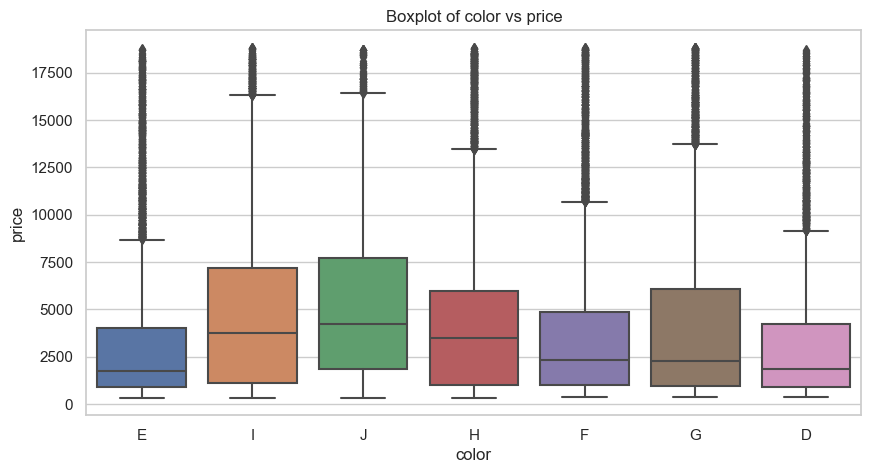

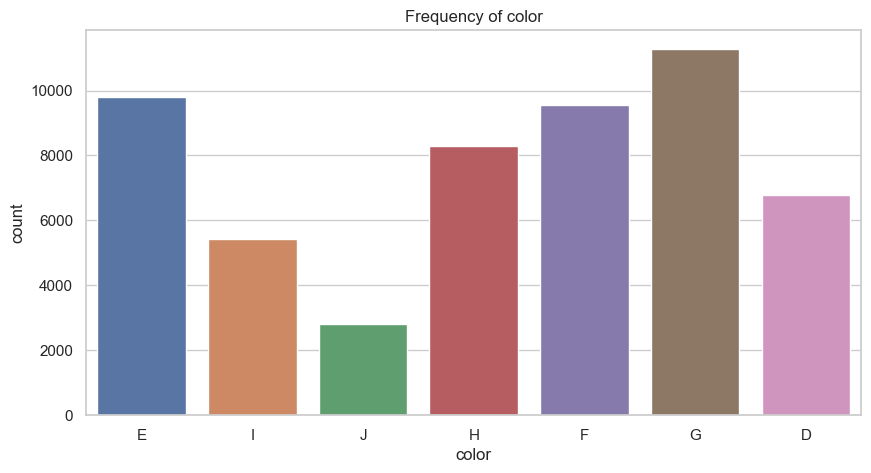

In [47]:
analyzer_color.visualize_boxplot()
analyzer_color.visualize_frequency()

The box plot graph between the Price and the color values show that graphically exist a difference in the price of each kind of color with some exceptions. We need to validate these difference using a statistical test

In [48]:
tester_color = HypothesisTester(df, 'color')

*<center>H0: Average price of stone with X color = Average price of stone with Y color<center>*
*<center>H1: Average price of stone with X color <> Average price of stone with Y color<center>*

In [49]:
tester_color.anova_test()

ANOVA Test for column: color
Resultados de la prueba ANOVA:
Valor F: 290.20588071108835
Valor p: 0.0
La diferencia entre las medias es estadísticamente significativa.


According to the results obtained in the ANOVA test, we can conclude that there is a statistically significant difference between the means of the prices depending on the color of the stones.

Now, I going to generate the hypothesis statisticall test for each pair of color values in order to identifying if there is type of color that does not generate a statiscticall impact in the price

Mann-Whitney U Test (D vs E):
p-value: 0.007048596255054776


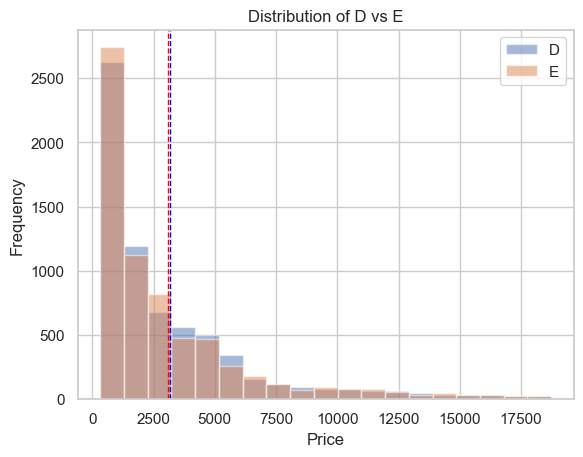

Mann-Whitney U Test (E vs F):
p-value: 5.960992383065234e-39


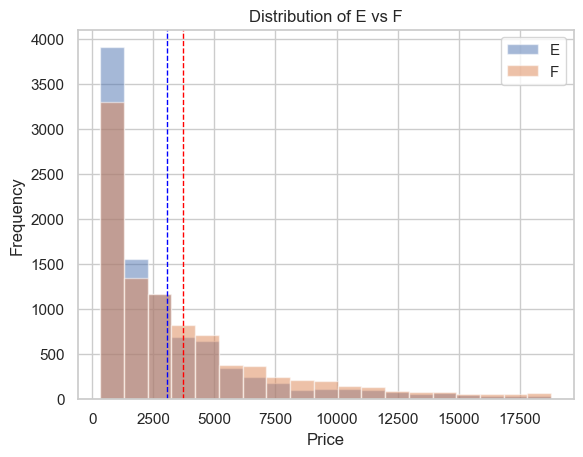

Mann-Whitney U Test (F vs G):
p-value: 0.13957846776584204


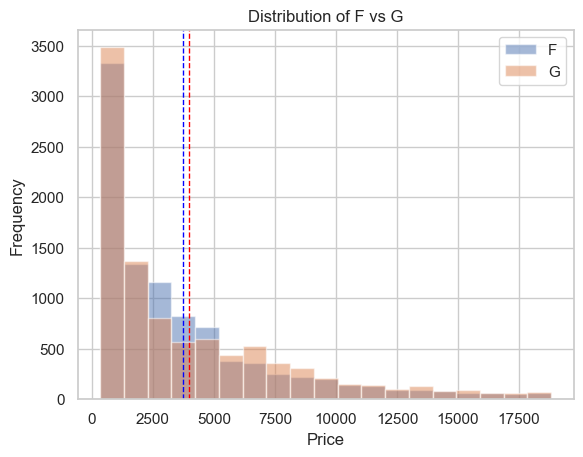

Mann-Whitney U Test (G vs H):
p-value: 3.80234798835129e-14


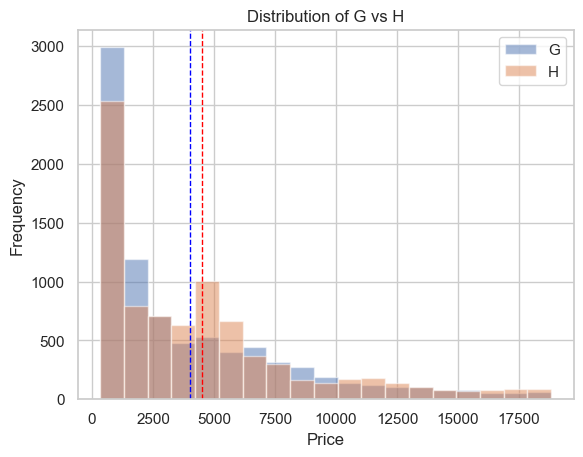

Mann-Whitney U Test (H vs I):
p-value: 1.4917185548653642e-07


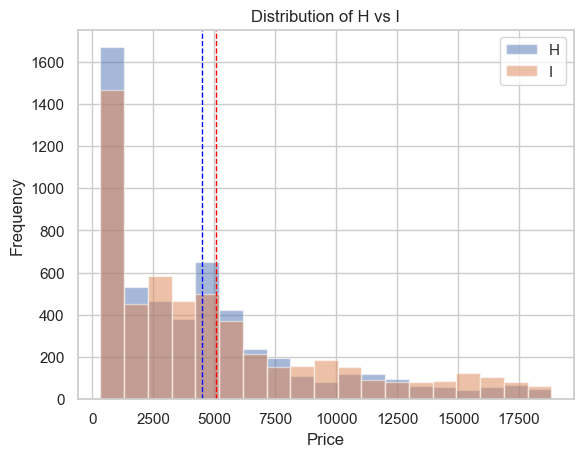

Mann-Whitney U Test (I vs J):
p-value: 1.5878423381468098e-05


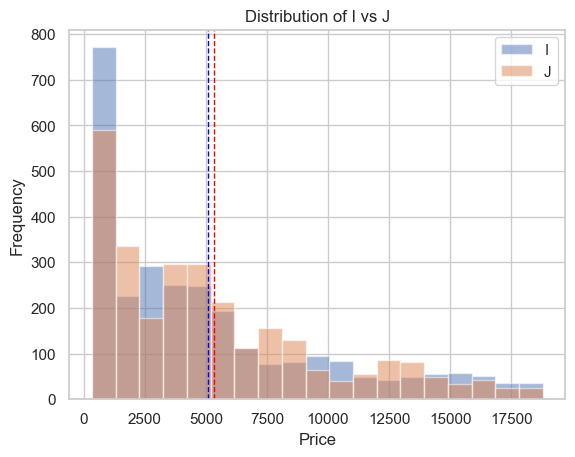

In [50]:
tester_color.mann_whitney_u_test(val1='D', val2='E')
tester_color.visualize_distributions(val1='D', val2='E')
tester_color.mann_whitney_u_test(val1='E', val2='F')
tester_color.visualize_distributions(val1='E', val2='F')
tester_color.mann_whitney_u_test(val1='F', val2='G')
tester_color.visualize_distributions(val1='F', val2='G')
tester_color.mann_whitney_u_test(val1='G', val2='H')
tester_color.visualize_distributions(val1='G', val2='H')
tester_color.mann_whitney_u_test(val1='H', val2='I')
tester_color.visualize_distributions(val1='H', val2='I')
tester_color.mann_whitney_u_test(val1='I', val2='J')
tester_color.visualize_distributions(val1='I', val2='J')


According with the p-value obtained for each test, we could not conclude that the average price of the stones with color F and the stones with color G are statistically differente, that is because the p-value is higher than the significance value wich is 0.05

#### G: cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

In [51]:
analyzer_clarity = DataAnalyzer(df, 'clarity')

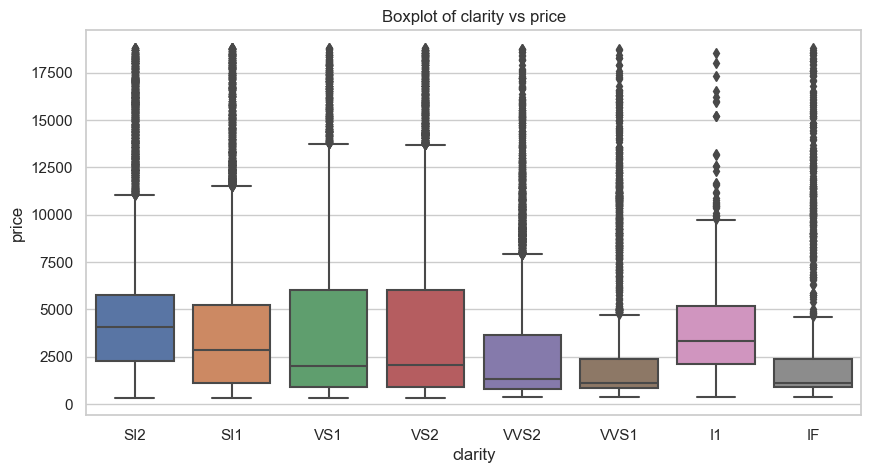

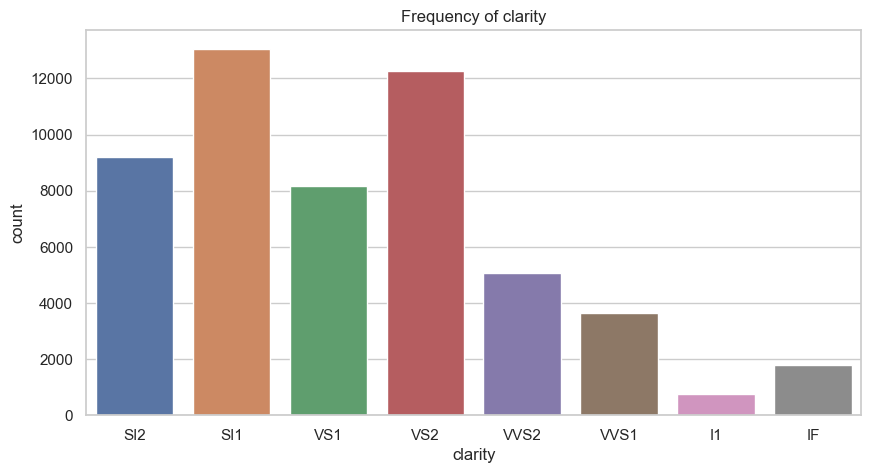

In [52]:
analyzer_clarity.visualize_boxplot()
analyzer_clarity.visualize_frequency()

According to the The box plot graph between the Price and the clarity values show that apparently exist a significant difference in the priceses for each type of clarity, however it is not seen that it was directly related to the quality of clarity considering the median values of each type of clarity, but the small amount of some types of clarity must also be taken into account, as can be seen in the frequency graph

*<center>H0: Average price of stone with X clarity = Average price of stone with Y clarity<center>*
*<center>H1: Average price of stone with X clarity <> Average price of stone with Y clarity<center>*

In [53]:
tester_clarity = HypothesisTester(df, 'clarity')

In [54]:
tester_clarity.anova_test()

ANOVA Test for column: clarity
Resultados de la prueba ANOVA:
Valor F: 215.01926041020076
Valor p: 1.9190895e-316
La diferencia entre las medias es estadísticamente significativa.


According to the results obtained in the ANOVA test, we can conclude that there is a statistically significant difference between the means of the prices depending on the clarity of the stones.

Now, I going to generate the hypothesis statisticall test for each pair of clarity values in order to identifying if there is type of color that does not generate a statiscticall impact in the price

Mann-Whitney U Test (IF vs VVS1):
p-value: 2.8937254312365645e-05


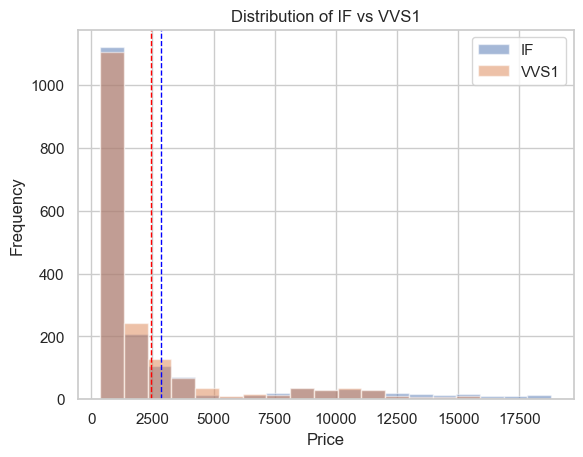

Mann-Whitney U Test (VVS1 vs VVS2):
p-value: 4.628669913830785e-12


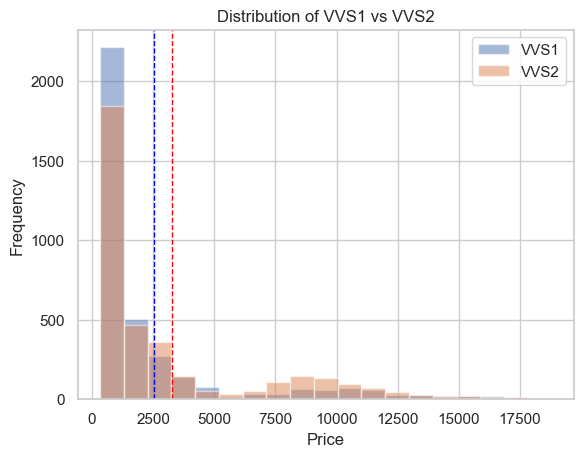

Mann-Whitney U Test (VVS2 vs VS1):
p-value: 2.4621258017540185e-22


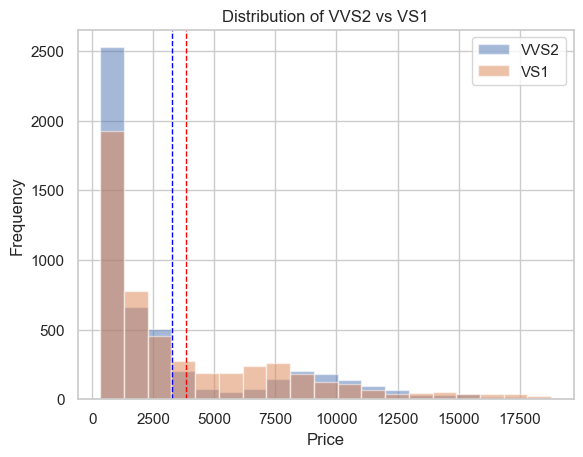

Mann-Whitney U Test (VS1 vs VS2):
p-value: 0.05707798795033407


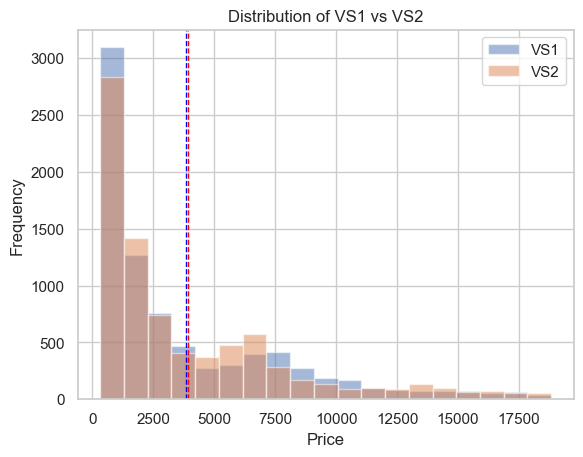

Mann-Whitney U Test (VS2 vs SI1):
p-value: 3.0331959304594775e-08


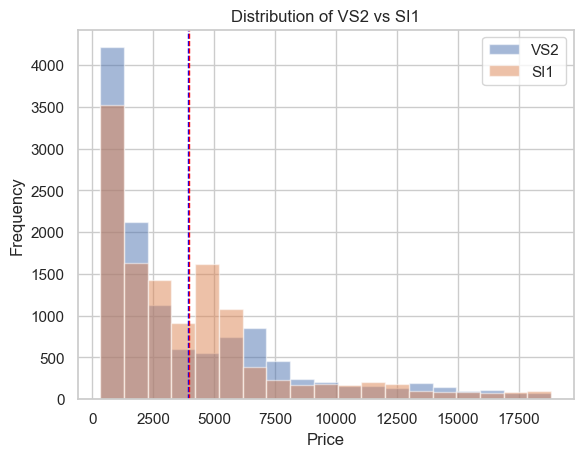

Mann-Whitney U Test (SI1 vs SI2):
p-value: 2.9681769877425263e-100


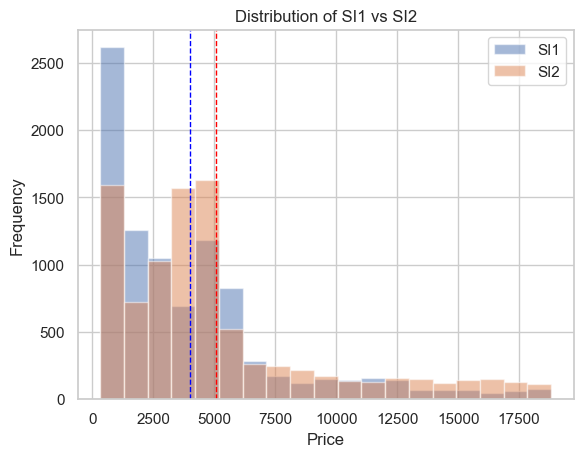

Mann-Whitney U Test (SI2 vs I1):
p-value: 2.323888152557995e-09


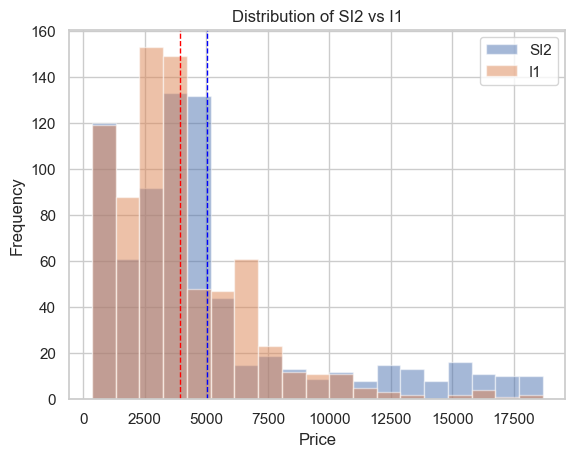

In [55]:
tester_clarity.mann_whitney_u_test(val1='IF', val2='VVS1')
tester_clarity.visualize_distributions(val1='IF', val2='VVS1')
tester_clarity.mann_whitney_u_test(val1='VVS1', val2='VVS2')
tester_clarity.visualize_distributions(val1='VVS1', val2='VVS2')
tester_clarity.mann_whitney_u_test(val1='VVS2', val2='VS1')
tester_clarity.visualize_distributions(val1='VVS2', val2='VS1')
tester_clarity.mann_whitney_u_test(val1='VS1', val2='VS2')
tester_clarity.visualize_distributions(val1='VS1', val2='VS2')
tester_clarity.mann_whitney_u_test(val1='VS2', val2='SI1')
tester_clarity.visualize_distributions(val1='VS2', val2='SI1')
tester_clarity.mann_whitney_u_test(val1='SI1', val2='SI2')
tester_clarity.visualize_distributions(val1='SI1', val2='SI2')
tester_clarity.mann_whitney_u_test(val1='SI2', val2='I1')
tester_clarity.visualize_distributions(val1='SI2', val2='I1')

According with the p-value obtained for each test, we could not conclude that the average price of the stones with clarity VS1 and the stones with clarity VS2 are statistically differente

## Data set Balancing

Now, I going to determine if the data set is balanced or not in terms of cutting quality, and if not I going to propose a method to generate synthetic data in order to balance it

The class below called DataBalancer has two methods, the method graph_cut that is a simple method to graph the frequency distribution of each value of the cut variable, and the main method called sampling that is the method that use SMOTE to generate synthetic data of the column passed by parameter, in this case would be the variable that we want to balance

In order to generate the synthetic data I used the SMOTE method, that is a very popular method to generate synthetic samples for the minority class by generating new data points that are similar to the existing minority class samples using k-nearest neighbors as an algorithm

In [64]:
class DataBalancer:

    def __init__(self, df):
        self.df = df

    #method to graph the distribution of the target variable (cut)
    def graph_cut(self):
        cut_distribution = self.df['cut'].value_counts()
        plt.figure(figsize=(10,5))
        plt.title('Cut Distribution')
        plt.xlabel('Cut')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.bar(cut_distribution.index, cut_distribution.values)
        #the percentage of each category is added to the graph
        for i, v in enumerate(cut_distribution.values):
            plt.text(i, v, str(round(v/len(self.df)*100, 2))+'%')
        plt.show()


    def sampling(self, column):
        X = self.df.drop("cut", axis=1)
        y = self.df["cut"]
        #the categorical variables are encoded and the first column of each one is removed to avoid multicollinearity
        X_encoded = pd.get_dummies(X, columns=["color", "clarity"], drop_first=True)
        #the data is divided into train and test
        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
        #the minority class is oversampled to balance the data using the SMOTE technique
        smote = SMOTE(sampling_strategy={column: len(y_train[y_train == column]) * 10}, random_state=42)
        #the data is resampled and concatenated
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        X_resampled = pd.concat([X_train_resampled, X_test])
        y_resampled = pd.concat([y_train_resampled, y_test])
        #the data is returned in a dataframe
        self.df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
        return self.df_resampled['cut'].value_counts()

In [65]:
data_balancer = DataBalancer(df)

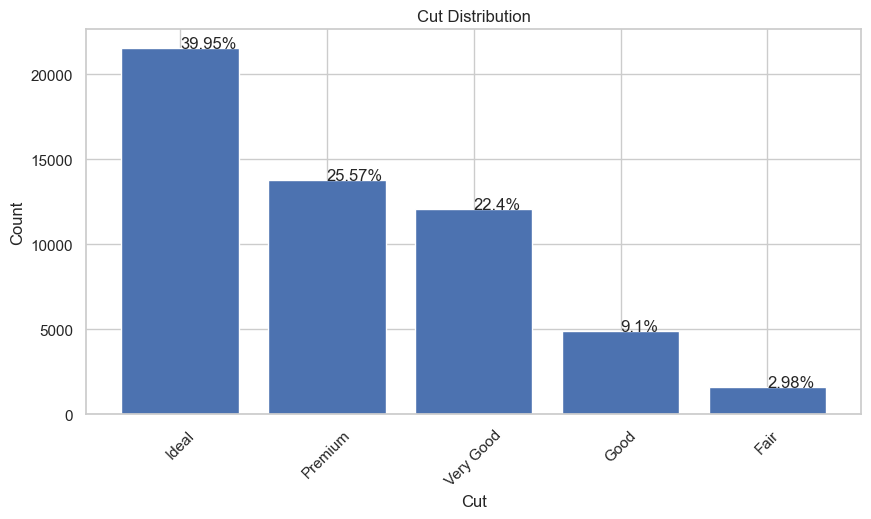

In [66]:
data_balancer.graph_cut()

The quality Fair is the kind of value with less registers; only 3% of the registers has this kind of quality cut, so this will be the value that I will select to balance

In [67]:
data_balancer.sampling("Fair")

cut
Ideal        21551
Premium      13791
Fair         13085
Very Good    12082
Good          4906
Name: count, dtype: int64

Using the method sampling from us class I generate 10 times more data from the Fair quality of cut

Conclusion: Using the method SMOTE, wich use k-nearest neighbors to generate synthetic data of the minority value keeping the distribution of the data, I balanced the dataset in terms of cutting quality. However I decided to keep the dataset with the original distribution of the data because the objective variable is the Price so we could work with that variable unbalanced without affecting the performance of the regression model, on the contrary we could be generating biases

## Dimensionality increment

Next I will generate new features related with the dimensions of the stones to increase the data dimensionality

In [57]:
#the dataframe is copied to a new dataframe to avoid any changes to the original dataframe
df_ext = df.copy()

#volume of a rectangular prism = length * width * height
df_ext['volume'] = df_ext['x'] * df_ext['y'] * df_ext['z']

#the density of cubic zirconia is 5.67 g/cm3 (https://en.wikipedia.org/wiki/Cubic_zirconia)
density_cubic_zirconia = 5.67
#density of a rectangular prism = density of the material * (volume / 1000)
df_ext['density'] = density_cubic_zirconia * (df_ext['volume'] / 1000)

#table diameter = length * width * (height / 100)
#culet diameter = length * width * (1 - height)
df_ext['table diameter'] = df_ext['x'] * df_ext['y'] * (df_ext['table'] / 100)
df_ext['culet diameter'] = df_ext['x'] * df_ext['y'] * (1 - df_ext['depth'])

The new variables generated were volume and density of the zirconia such as physical properties of the stone, and table and culet diameter such as metrics.

It should be noted that it is very likely that these new variables have a very high correlation with the other variables in the dataset because they are directly calculated as multiples of these. This can lead to multilinearity problems

## Multilinearity analysis

In order to avoid modeling with variables that have a high correlation between them, the linear relationships between variables of the data set will be analyzed to finally select the definitive variables with which the model will be trained

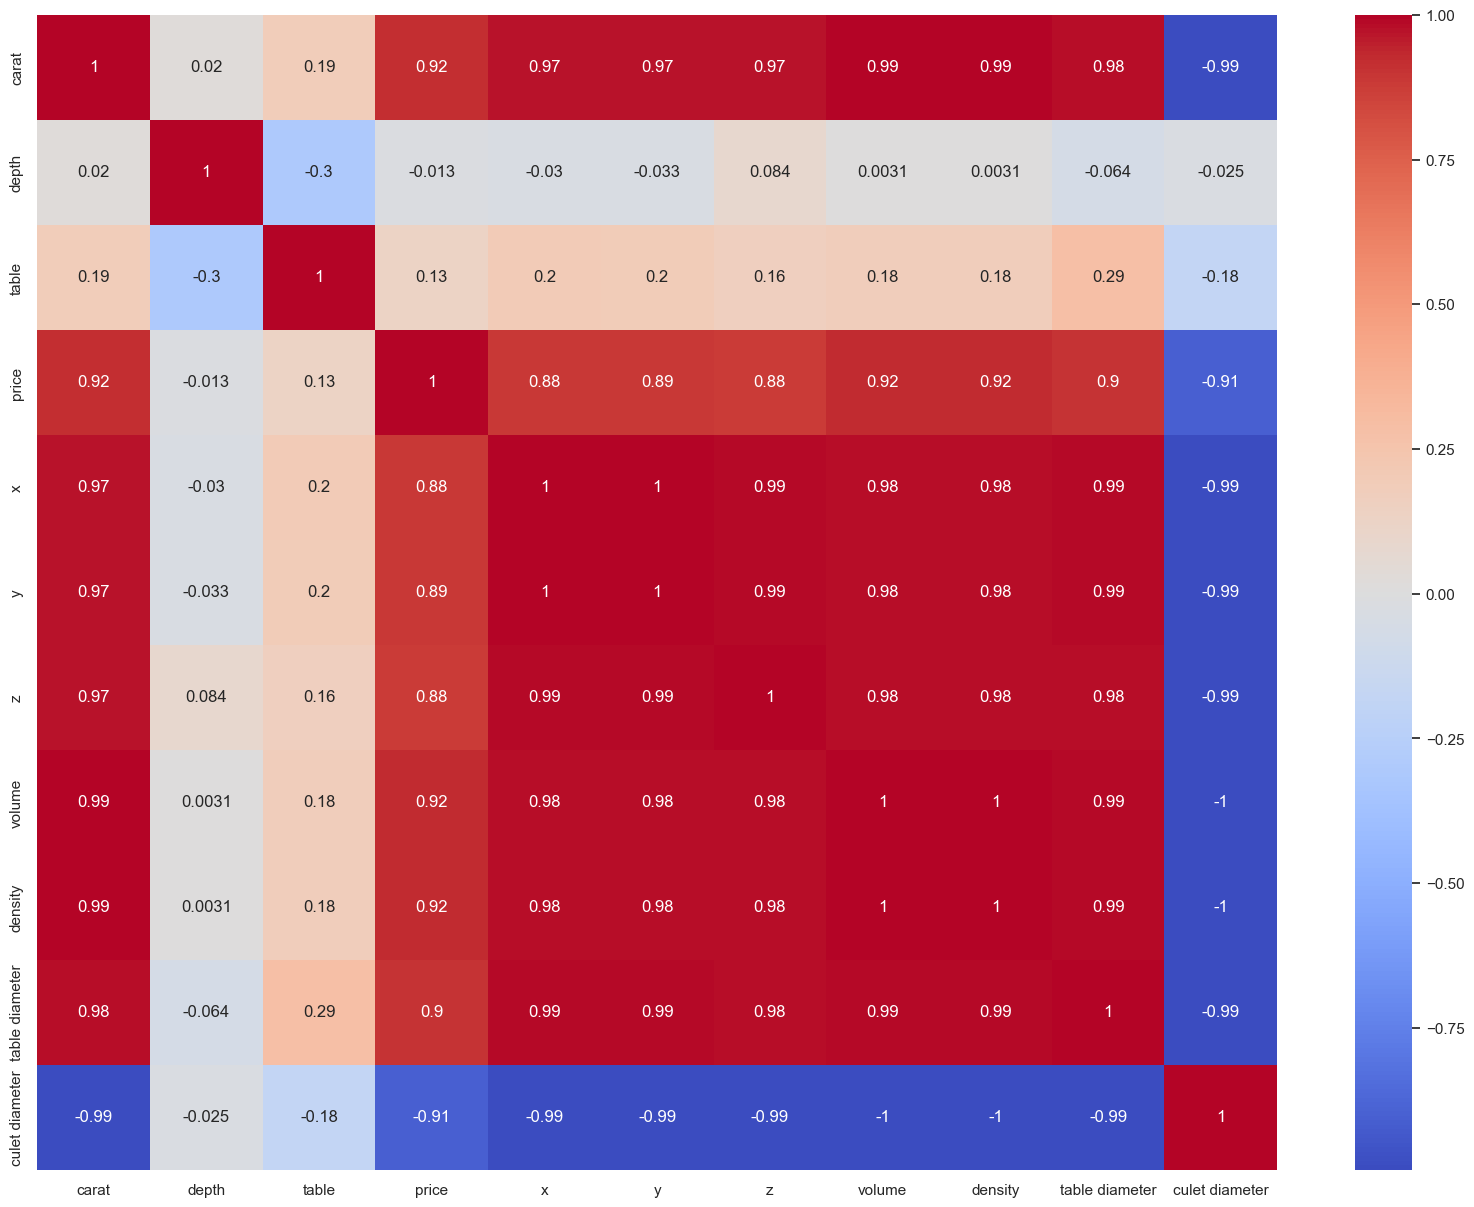

In [58]:
#numeric features for the correlation matrix
numeric_features = [feature for feature in df_ext.columns if df_ext[feature].dtypes != 'O']
#correlation is calculated only for numeric features
corr_matrix = df_ext[numeric_features].corr()
#plot the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

The previoud correlation matrix show that all the variables related with the dimensions of the zircona has a very hight linear relation, so leaving them all can generate a lot of noise to the model and affect its performance. It is decided to just leave the variable depth as representative of the dimension

In [ ]:
#the features are: carat, cut, color, clarity, depth, table, price, x, y, z
features_selected = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']
#the new dataframe will have only the features selected
df = df[features_selected]
#the dataframe is saved in a csv file in the data folder
df.to_csv('data/diamonds_df.csv', index=False)

Finaly I saved the final dataset for the modeling part